In [27]:
import extcolors
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [53]:
def kmeansColorCluster(image, clusters, rounds):
        """
        Parameters
            image <np.ndarray> : 이미지
            clusters <int> : 클러스터 개수 (군집화 개수)
            rounds <int> : 알고리즘을 몇 번 실행할지 (보통 1)
        returns
            clustered Image <np.ndarray> : 결과 이미지
            SSE <float> : 오차 제곱 합
        """
        
        height, width = image.shape[:2]
        samples = np.zeros([ height * width, 3 ], dtype=np.float32)
        
        count = 0
        for x in range(height):
            for y in range(width):
                samples[count] = image[x][y]
                count += 1
        
        '''
        # compactness : SSE = 오차 제곱 합
        # labels : 레이블 배열 (0과 1로 표현)
        # centers : 클러스터 중심 좌표 (k개로 군집화된 색상들)
        '''
        compactness, labels, centers = cv2.kmeans(
                    samples, # 비지도 학습 데이터 정렬
                    clusters, # 군집화 개수
                    None, # 각 샘플의 군집 번호 정렬
                    # criteria : kmeans 알고리즘 반복 종료 기준 설정
                    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 
                                10000, # max_iter 
                                0.0001), # epsilon 
                    # attempts : 다른 초기 중앙값을 이용해 반복 실행할 횟수
                    attempts = rounds, 
                    # flags : 초기 중앙값 설정 방법
                    flags = cv2.KMEANS_PP_CENTERS)
        
        centers = np.uint8(centers)
        res = centers[labels.flatten()]
        
        # 결과 이미지, 초기 중앙값, 오차제곱합 반환
        return res.reshape((image.shape))


In [74]:
def extract_colors(n):
    image = Image.open(f"selenium_crawling/image/image_{n}.jpg")
    
    # 이미지 자르기 crop함수 이용 ex. crop(left,up, rigth, down)
    croppedImage=image.crop((10,10,100,100))
    image1 = image.crop((20,262, 680, 787))
    
    image1 = kmeansColorCluster(np.array(image1), 6, 1)
    image1 = Image.fromarray(image1)

    croppedImage = kmeansColorCluster(np.array(croppedImage), 6, 1)
    croppedImage = Image.fromarray(croppedImage)


    colors_c, _ = extcolors.extract_from_image(croppedImage)
    colors, _ =  extcolors.extract_from_image(image1)
    color_list = [i[0] for i in colors if i[0] != colors_c[0][0]]
    color_arr = np.array(color_list)
    return color_arr

In [75]:
def _color_to_pic(color, size=(32, 32)):
    color_arr = [color for i in range(size[1])]
    color_arr = [color_arr for i in range(size[0])]
    color_arr = np.array(color_arr)
    return color_arr

In [76]:
def print_palette(color_arr):
    n = len(color_arr)
    for i, color in enumerate(color_arr):
        arrayToImage = Image.fromarray(_color_to_pic(color), mode='RGB')
        plt.subplot(1, n, i+1)
        plt.imshow(_color_to_pic(color))


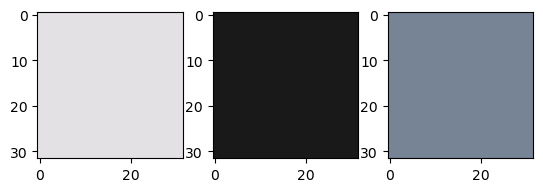

In [77]:
extract_colors(1)
print_palette(extract_colors(1))